<a href="https://colab.research.google.com/github/Pro-Mentor/ml-model/blob/main/SE_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# to preprocess text data
import string
import nltk
# from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

from textblob import Word
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path = "/content/drive/MyDrive/FYP/datasets/indeed-software-engineer-jobs.csv"
df = pd.read_csv(path)
df.head(5)

,Unnamed: 0,Name,Company,City,Ratings,Summary,Date
0,0,Entry level Software Engineer,CapitalPlanHoldings,"San Francisco, CA",NaN,"Programming experience using C#, C++, or Java ...",2 days ago
1,1,Junior Software Engineer,FormSwift,"San Francisco, CA",NaN,Building new product features across the back ...,30+ days ago
2,2,Software Engineer,Microsoft,"San Francisco, CA",4.2,Yammer-THE social network for workplace-is hir...,5 days ago
3,3,Software Engineer - Entry Level,Pathrise,"San Francisco Bay Area, CA",NaN,You'll be expected to deliver in an agile envi...,2 days ago
4,4,Software Engineer (Python),Imgix,"San Francisco, CA",NaN,Comfortable developing in Python (or similar)....,5 days ago


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   Name        10000 non-null  object 
 2   Company     10000 non-null  object 
 3   City        10000 non-null  object 
 4   Ratings     6224 non-null   float64
 5   Summary     10000 non-null  object 
 6   Date        10000 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 547.0+ KB


In [ ]:
df.isna().sum()

Unnamed: 0       0
Name             0
Company          0
City             0
Ratings       3776
Summary          0
Date             0
dtype: int64

In [ ]:
# ratings column can be dropped
df = df.drop('Ratings', axis=1)
df.head(5)

,Unnamed: 0,Name,Company,City,Summary,Date
0,0,Entry level Software Engineer,CapitalPlanHoldings,"San Francisco, CA","Programming experience using C#, C++, or Java ...",2 days ago
1,1,Junior Software Engineer,FormSwift,"San Francisco, CA",Building new product features across the back ...,30+ days ago
2,2,Software Engineer,Microsoft,"San Francisco, CA",Yammer-THE social network for workplace-is hir...,5 days ago
3,3,Software Engineer - Entry Level,Pathrise,"San Francisco Bay Area, CA",You'll be expected to deliver in an agile envi...,2 days ago
4,4,Software Engineer (Python),Imgix,"San Francisco, CA",Comfortable developing in Python (or similar)....,5 days ago


In [ ]:
# we only need job title and description
# dropping multiple columns
columns_to_drop = [df.columns[0], 'Company', 'City', 'Date']
df = df.drop(columns_to_drop, axis=1)

In [ ]:
df.head(2)

,Name,Summary
0,Entry level Software Engineer,"Programming experience using C#, C++, or Java ..."
1,Junior Software Engineer,Building new product features across the back ...


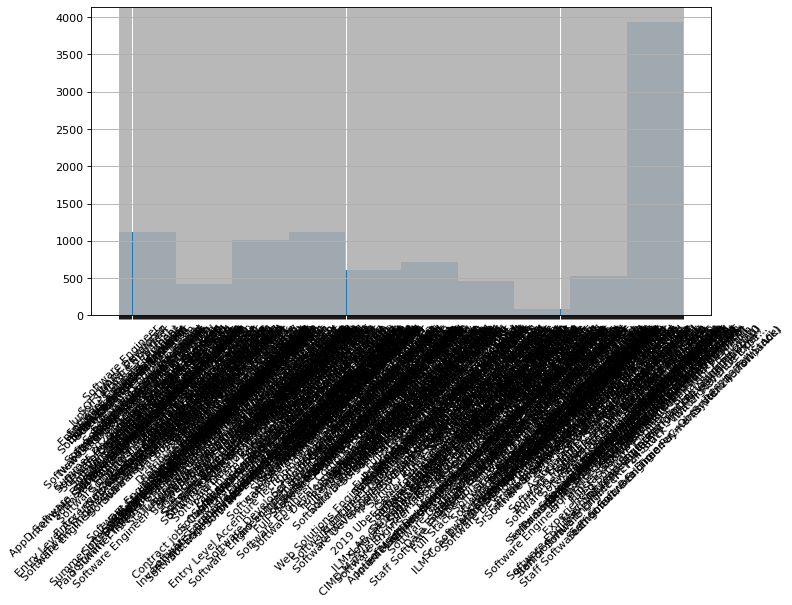

In [ ]:
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
df.Name.hist()

plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

# Show the plot
plt.show()

In [ ]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Name,Entry level Software Engineer,Junior Software Engineer,Software Engineer,Software Engineer - Entry Level,Software Engineer (Python),SOFTWARE ENGINEER,AppD Software Engineer Bachelor's (Intern) Uni...,Software Engineer - University Graduate,Entry Level DevOps Engineer,Software Engineer- Capacity,"Software Engineer, Videos","Intern, Software Engineering",Software Engineering Intern,Junior Developer,New Graduate: Software Engineering,Junior Full Stack Engineer,"Software Engineer, Square Capital",Entry Level DevOps Engineer,Internship: Social - Software Engineer Summer ...,Software Engineer - University Graduate
Summary,"Programming experience using C#, C++, or Java ...",Building new product features across the back ...,Yammer-THE social network for workplace-is hir...,You'll be expected to deliver in an agile envi...,Comfortable developing in Python (or similar)....,(3.) To maintain the existing project and reso...,"Java server side web frameworks (SpringMVC, St...",Solid experience working with or familiarity a...,Essential Criteria: • Bachelor’s degree (prefe...,San Francisco applicants: Pursuant to the San ...,Fluent in Java and have opinions about Java St...,Experience in Software Development in any obje...,"We are headquartered in San Francisco, Califor...",(3.) To maintain the existing project and reso...,Impact the product through diverse projects su...,Join our Engineering team in San Francisco!Joi...,Our global benefits package includes: Healthca...,Essential Criteria: • Bachelor’s degree (prefe...,You will build server-side systems that delive...,Solid experience working with or familiarity a...


In [ ]:
# Make a copy of the original DataFrame to perform edits on
df_tmp = df.copy()

df_tmp['title'] = df_tmp.Name
df_tmp['description'] = df_tmp.Summary

df_tmp.head().T

,0,1,2,3,4
Name,Entry level Software Engineer,Junior Software Engineer,Software Engineer,Software Engineer - Entry Level,Software Engineer (Python)
Summary,"Programming experience using C#, C++, or Java ...",Building new product features across the back ...,Yammer-THE social network for workplace-is hir...,You'll be expected to deliver in an agile envi...,Comfortable developing in Python (or similar)....
title,Entry level Software Engineer,Junior Software Engineer,Software Engineer,Software Engineer - Entry Level,Software Engineer (Python)
description,"Programming experience using C#, C++, or Java ...",Building new product features across the back ...,Yammer-THE social network for workplace-is hir...,You'll be expected to deliver in an agile envi...,Comfortable developing in Python (or similar)....


In [ ]:
df_tmp = df_tmp.drop(['Name', 'Summary'], axis=1)
df_tmp.head().T

,0,1,2,3,4
title,Entry level Software Engineer,Junior Software Engineer,Software Engineer,Software Engineer - Entry Level,Software Engineer (Python)
description,"Programming experience using C#, C++, or Java ...",Building new product features across the back ...,Yammer-THE social network for workplace-is hir...,You'll be expected to deliver in an agile envi...,Comfortable developing in Python (or similar)....


In [ ]:
# Check the values of different columns

# Set the display option to show all rows
pd.set_option('display.max_rows', None)

df_tmp.title.value_counts()

Software Engineer                                                  542
Senior Software Engineer                                           479
Online Marketing Associate - 2020 Graduate                         336
iOS Engineer                                                       315
Staff Software Engineer                                            241
Frontend Engineer, Identity                                        235
Software Engineer, Embedded Systems - University Graduate          227
Web Developer Engineer                                             227
Machine Learning Engineer - Health ML                              226
Junior Java Backend Engineer - San Mateo, CA                       225
Software Testing Development Engineer                              225
Machine Learning Engineer                                          222
Infrastructure Software Engineer                                   209
Principal Software Engineer                                        209
Softwa

In [ ]:
df_tmp.replace({'Senior Software Engineer': 'Software Engineer'}, inplace=True)
df_tmp.head().T

,0,1,2,3,4
title,Entry level Software Engineer,Junior Software Engineer,Software Engineer,Software Engineer - Entry Level,Software Engineer (Python)
description,"Programming experience using C#, C++, or Java ...",Building new product features across the back ...,Yammer-THE social network for workplace-is hir...,You'll be expected to deliver in an agile envi...,Comfortable developing in Python (or similar)....


In [ ]:
df_se = df_tmp[df_tmp['title'] == 'Software Engineer'][['title', 'description']]
len(df_se)

# 1021 job descriptions of software engineer job role

1021

In [ ]:
# export the SE dataframe
df_se.to_csv('/content/drive/MyDrive/FYP/datasets/preprocessed/se-job-descriptions.csv', index=False)

In [ ]:
df_se = pd.read_csv('/content/drive/MyDrive/FYP/datasets/preprocessed/se-job-descriptions.csv')
df_se.head(20)

,title,description
0,Software Engineer,Yammer-THE social network for workplace-is hir...
1,Software Engineer,"Design and deploy scalable, secure infrastruct..."
2,Software Engineer,The Adobe Stock service is built right into Ad...
3,Software Engineer,You’ll take part in maturing our product by cr...
4,Software Engineer,"Work side by side with researchers, and resear..."
5,Software Engineer,In this position you'll be mostly using C++.We...
6,Software Engineer,Experience/interest in any of the following la...
7,Software Engineer,The Adobe Stock service is built right into Ad...
8,Software Engineer,The Adobe Stock service is built right into Ad...
9,Software Engineer,Open locations include New York City and San F...


# **Preprocess text data**

Since the data we're now working with is at its rawest form, we need to preprocess it before extracting information from it.

in this step, we will:

1.  Convert all text to lower cases
2.  Delete all tabulation,spaces, and new lines
3.  Delete all numericals
4.  Delete nltk's defined stop words
5.  Lemmatize text

In [ ]:
## Lower case
df_se['description'] = df_se['description'].apply(lambda x: " ".join(x.lower()for x in x.split()))

## remove tabulation and punctuation
df_se['description'] = df_se['description'].str.replace('[^\w\s]',' ')

## digits
df_se['description'] = df_se['description'].str.replace('\d+', '')

#remove stop words
stop = stopwords.words('english')
df_se['description'] = df_se['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

## lemmatization
df_se['description'] = df_se['description'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

print("Preprocessed data: \n")
print(df_se.head())

<ipython-input-21-9f2f42c43c78>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_se['description'] = df_se['description'].str.replace('[^\w\s]',' ')
<ipython-input-21-9f2f42c43c78>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df_se['description'] = df_se['description'].str.replace('\d+', '')


NameError: ignored

# **Visualize data**

In this step, we will **aggregate our data by job titles** in order to visualy detect the most frequent words for each job.

In [ ]:
## jda stands for job description aggregated
jda = df_se.groupby(['title']).sum().reset_index()
print("Aggregated job descriptions: \n")
print(jda)

In [ ]:
## Visualize data
jobs_list = jda.title.unique().tolist()
for job in jobs_list:

    # Start with one review:
    text = jda[jda.title == job].iloc[0].description
    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)
    print("\n***",job,"***\n")
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [ ]:
jobs_list

In [ ]:
# Check the values of different columns

# Set the display option to show all rows
pd.set_option('display.max_rows', None)

df_tmp.title.value_counts()

Software Engineer                                                  1021
Online Marketing Associate - 2020 Graduate                          336
iOS Engineer                                                        315
Staff Software Engineer                                             241
Frontend Engineer, Identity                                         235
Web Developer Engineer                                              227
Software Engineer, Embedded Systems - University Graduate           227
Machine Learning Engineer - Health ML                               226
Software Testing Development Engineer                               225
Junior Java Backend Engineer - San Mateo, CA                        225
Machine Learning Engineer                                           222
Infrastructure Software Engineer                                    209
Principal Software Engineer                                         209
Software Engineer - Revenue Data Platform (Revenue Platform)    

In [ ]:
df_qa1 = df_tmp[df_tmp['title'] == 'Software Testing Development Engineer'][['title', 'description']]
len(df_qa1)

225

In [ ]:
df_qa1.to_csv('/content/drive/MyDrive/FYP/datasets/preprocessed/qa-job-descriptions-2.csv', index=False)